<a href="https://colab.research.google.com/github/satyam-261/LLM-GenAI-Projects/blob/main/SKR_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font size=10>Introduction to LLMs and GenAI</center></font></h1>
<h1><center>Mini Project 1 : Basics of NLP: Text Cleaning & Vectorization</center></h1>

#
This project is about sentiment analysis of the reviews of a product. We are building a machine learning model for the same so the humans involvement is less.


# Business Context
In today’s fast-paced e-commerce landscape, customer reviews significantly influence product perception and buying decisions. Businesses must actively monitor customer sentiment to extract insights and maintain a competitive edge. Ignoring negative feedback can lead to serious issues, such as:

* Customer Churn: Unresolved complaints drive loyal customers away, reducing retention and future revenue.

* Reputation Damage: Persistent negative sentiment can erode brand trust and deter new buyers.

* Financial Loss: Declining sales and shifting customer preference toward competitors directly impact profitability.

Actively tracking and addressing customer sentiment is essential for sustained growth and brand strength.

# Problem Definition
A growing e-commerce platform specializing in electronic gadgets collects customer feedback from product reviews, surveys, and social media. With a 200% increase in their customer base over three years and a recent 25% spike in feedback volume, their manual review process is no longer sustainable.

To address this, the company aims to implement an AI-driven solution to automatically classify customer sentiments (positive, negative, or neutral).

As a Data Scientist, your task is to analyze the provided customer reviews—along with their labeled sentiments—and build a predictive model for sentiment classification.

# Data Dictionary
- *Product ID:* An exclusive identification number for each product

- *Product Review*: Insights and opinions shared by customers about the product

- *Sentiment*: Sentiment associated with the product review, indicating whether the review expresses a positive, negative, or neutral sentiment

Importing the necessary libraries for this project

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


<h1><center>Loading Data Set</center></h1>

In [ ]:
#loading the data into a pandas dataframe
df= pd.read_csv("/content/drive/MyDrive/Intro to LLM and GenAI/Part-1/Project-1/Product_Reviews.csv")

**Data Overview**

Checking the first 3 rows of the data

In [ ]:
df.head(3)

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE


/content/drive/MyDrive/Intro to LLM and GenAI/Part-1/Product_Reviews.csv


Checking the shape of the dataset

In [ ]:
df.shape

(1007, 3)

The dataset has 1007 rows and 3 columns

Checking for Missing Values

In [ ]:
df.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


The dataset has no missing values.


**Checking for duplicate values**

In [ ]:
df.duplicated().sum()

np.int64(2)

*   There are 2 duplicate values in the dataset
*   We'll drop them


In [ ]:
#dropping duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

Dropped the duplicate values.

Checking the shape of the modified dataset

In [ ]:
df.shape

(1005, 3)

After dropping the duplicate values we got 1005 rows and 3 columns in the dataset

# **Exploratory Data Analysis (EDA)**

Distribution of sentiments.

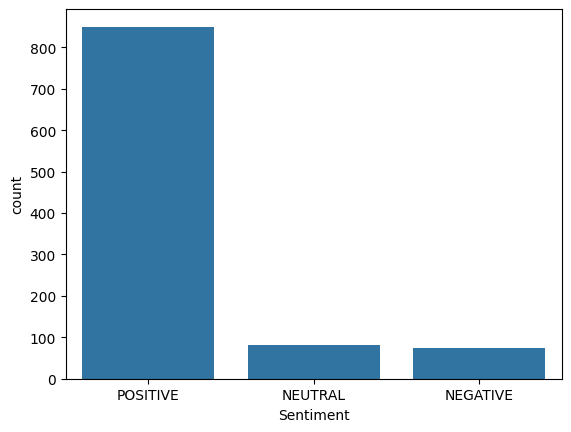

In [ ]:
plt
sns.countplot(data=df, x="Sentiment");

##### observation
* Number of positive reviews is very high as compared to negative or neutral. So the data is imbalanced. And we cannot use accuracy as an evaluation matrix.

In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
POSITIVE,850
NEUTRAL,81
NEGATIVE,74


In [ ]:
df['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


Majority of the reviews are positive (\~85%), followed by neutral reviews (8%), and then the positive reviews (\~7%)

# Recommended Metrics for this Case:
| Metric                               | Why It's Important                                                                  |
| ------------------------------------ | ----------------------------------------------------------------------------------- |
| **Macro F1-Score**                   | Gives equal importance to all 3 classes regardless of imbalance.                    |
| **Per-class Precision & Recall**     | Helps you understand how well the model detects **Neutral** and **Negative** cases. |
| **Confusion Matrix**                 | Shows what types of mistakes your model is making.                                  |
| *(Optional)* **ROC-AUC (per class)** | Can be helpful if you're using probabilistic outputs.                               |


#### Macro F1 vs Micro F1
| Type         | Use When                                              | What It Does                           |
| ------------ | ----------------------------------------------------- | -------------------------------------- |
| **Macro F1** | Treat all classes equally (class-balanced evaluation) | Averages F1 across all classes         |
| **Micro F1** | Use when class sizes vary (class-imbalanced)          | Calculates global counts of TP, FP, FN |


# **Test Preprocessing**

**Removing special characters from the text**

In [ ]:
# defining a func to remove special chars
def remove_special_characters(text):
  #defining the regex pattern to match the non-alphanumeric chars
  pattern = '[^A-Za-z0-9]+'

  #finding the specified pattern and replacing non-aplhanumeric chars with a blank string
  new_text = ''.join(re.sub(pattern, ' ',text))

  return new_text

In [ ]:
# Applying the func to remove special chars
df['Cleaned_text'] = df['Product Review'].apply(remove_special_characters)

In [ ]:
#checking a couple of instances of cleaned data
df.head(2)

,Product ID,Product Review,Sentiment,Cleaned_text
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE,I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE,Allow me to preface this with a little history I am was a casual reader who owned a Nook Simple Touch from 2011 I ve read the Harry Potter series Girl with the Dragon Tattoo series 1984 Brave New World and a few other key titles Fair to say my Nook did not get as much use as many others may have gotten from theirs Fast forward to today I have had a f

We can observe that the function removed the special characters and retained the aplhabets and numbers

**Lowercasing**

In [ ]:
#changing the case of the text data to lower case
df['Cleaned_text'] = df['Cleaned_text'].str.lower()

In [ ]:
df.head(2)

,Product ID,Product Review,Sentiment,Cleaned_text
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE,allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a f

We can observe that all the text has now successfully been converted to lowercase

**Removing extra whitespace**

In [ ]:
#removing extra whitespaces from the text
df['Cleaned_text'] = df['Cleaned_text'].str.strip()

In [ ]:
df.head(3)

,Product ID,Product Review,Sentiment,Cleaned_text
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE,allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a f

**Removing Stopwords**

*   The idea with stop word removal is to exclude words that appear frequently throughout all the documents in the corpus.
*   Pronouns and articles are typically categorized as stop words.
*   The NLTK library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.


In [ ]:
#defining a function to remove stopwords using the NLTK library
def remove_stopwords(text):
  #Split text into seperate words
  words = text.split()

  new_text=' '.join([word for word in words if word not in stopwords.words('english')])

  return new_text


In [ ]:
df['cleaned_text_without_stopwords'] = df['Cleaned_text'].apply(remove_stopwords)

In [ ]:
#checking couple of instances of cleaned data
df.head(2)

,Product ID,Product Review,Sentiment,Cleaned_text,cleaned_text_without_stopwords
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now 

We observe that all the stopwords have been removed.

# **Stemming/Lemmatization**

### Stemming v/s Lemmatization
| Feature                       | **Stemming**                                              | **Lemmatization**                                                |
| ----------------------------- | --------------------------------------------------------- | ---------------------------------------------------------------- |
| **Definition**                | Removes suffixes to reduce words to root form             | Converts word to its **dictionary base form (lemma)**            |
| **Output Example**            | “running” → **run**, “studies” → **studi**                | “running” → **run**, “studies” → **study**                       |
| **Approach**                  | Rule-based truncation (chops off ends)                    | Dictionary + morphological analysis                              |
| **Accuracy**                  | Lower (may produce non-words)                             | Higher (always valid words)                                      |
| **Speed**                     | Fast (simpler rules)                                      | Slower (more complex processing)                                 |
| **Tool Examples**             | `PorterStemmer`, `SnowballStemmer`                        | `WordNetLemmatizer`, `spaCy`                                     |
| **Grammatical Understanding** | ❌ No                                                      | ✅ Yes (considers part-of-speech)                                 |
| **Language Dependency**       | Mostly English, rule-based                                | Requires proper linguistic resources                             |
| **Use Case**                  | When speed is critical and precision isn’t (e.g., search) | When precision matters (e.g., text understanding, summarization) |


#### Summary:
* Stemming: Quick, crude chopping of word ends. Fast but less accurate.
* Lemmatization: Smart, linguistic reduction to base form. Slower but more accurate.



Comparision of Stemming, Lemmatization and POS (Parts of Speech) Lemmatization

In [ ]:
# Stemming using NLTK (PorterStemmer)
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

words = ["running", "studies", "flies", "easily", "happiness"]

for word in words:
    print(f"{word} → {stemmer.stem(word)}")


running → run
studies → studi
flies → fli
easily → easili
happiness → happi


In [ ]:
#STEMMING: using NLTK (PorterStemmer)

# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

# Initialize the PorterStemmer
ps = PorterStemmer()

# Applying the function to perform stemming
df['final_cleaned_text'] = df['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)


#We used nltk (natural lang tool kit) for stemming /lemmatization

In [ ]:
df.head(2)

,Product ID,Product Review,Sentiment,Cleaned_text,cleaned_text_without_stopwords,final_cleaned_text
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service,initi troubl decid paperwhit voyag review less said thing paperwhit great spend money go voyag fortun friend own end buy paperwhit basi model 300 ppi 80 dollar jump turn pricey voyag page press alway sensit fine specif set need auto light adjust week love paperwhit regret touch screen recept easi use keep light specif set regardless time day case hard chang set either chang light level certain time day everi read also glad went intern ship option amazon extra expens deliveri time track didnt need worri custom may use third parti ship servic
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all ba

#Lemmmatization

In [ ]:
# Lemmatization using NLTK (WordNetLemmatizer)
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet #Downloads the WordNet lexical database.WordNet is adictionary-like database where Words are grouped into sets of synonyms
import nltk

# Make sure to download WordNet resources if not already done
nltk.download('wordnet')
nltk.download('omw-1.4') # Open Multilingual WordNet package -This adds language translations, richer word forms, and improved morphological data to WordNet.

lemmatizer = WordNetLemmatizer()

words = ["running", "studies", "flies", "better", "happiness"]

for word in words:
    print(f"{word} → {lemmatizer.lemmatize(word)}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


running → running
studies → study
flies → fly
better → better
happiness → happiness


In [ ]:
#LEMMETISATION:
# defining a function to perform stemming
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("running", pos="v"))
def apply_lemmatizer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([lemmatizer.lemmatize(word) for word in words])

    return new_text



# Applying the function to perform stemming
df['final_cleaned_text'] = df['cleaned_text_without_stopwords'].apply(apply_lemmatizer)

run


In [ ]:
df.loc[0:2,['cleaned_text_without_stopwords', 'final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service,initially trouble deciding paperwhite voyage review less said thing paperwhite great spending money go voyage fortunately friend owned ended buying paperwhite basis model 300 ppi 80 dollar jump turn pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regret touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry custom may used third party shipping service
1,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key title fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger game trilogy shall moving onto divergent series soon thing nook hindered past 4 year never inspired pick get hand dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded book ton reading still half battery left well make happy inspire reader inside
2,enjoying far great reading original fire since 2012 fire used make eyes hurt read long experienced paperwhite yet,enjoying far great reading original fire since 2012 fire used make eye hurt read long experienced paperwhite yet


In [ ]:
wordnet.synonyms('running')

[['run', 'running_game', 'running_play'],
 ['run'],
 [],
 [],
 ['track'],
 ['run'],
 ['break_away',
  'bunk',
  'escape',
  'fly_the_coop',
  'head_for_the_hills',
  'hightail_it',
  'lam',
  'run',
  'run_away',
  'scarper',
  'scat',
  'take_to_the_woods',
  'turn_tail'],
 ['extend', 'go', 'lead', 'pass', 'run'],
 ['operate', 'run'],
 ['go', 'run'],
 ['course', 'feed', 'flow', 'run'],
 ['function', 'go', 'operate', 'run', 'work'],
 ['range', 'run'],
 ['campaign', 'run'],
 ['play', 'run'],
 ['run'],
 ['be_given', 'incline', 'lean', 'run', 'tend'],
 ['run'],
 ['run'],
 ['run'],
 ['run'],
 ['die_hard', 'endure', 'persist', 'prevail', 'run'],
 ['run'],
 ['execute', 'run'],
 ['carry', 'run'],
 ['run'],
 ['draw', 'guide', 'pass', 'run'],
 ['lead', 'run'],
 ['run'],
 ['black_market', 'run'],
 ['run'],
 ['bleed', 'run'],
 ['run'],
 ['run'],
 ['run', 'run_for'],
 ['run'],
 ['consort', 'run'],
 ['run'],
 ['run'],
 ['ply', 'run'],
 ['hunt', 'hunt_down', 'run', 'track_down'],
 ['race', 'run'],
 

The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

# **Text Vectorization**

* Text vectorization is the process of converting text into numerical format so that machine learning models can understand and work with it.

* Since ML models can't work with raw text (like "cat", "apple", "good"), we transform the text into vectors (arrays of numbers) that represent words, sentences, or documents.

METHODS:

Bag of words,
TF-IDF,
N-grams,
Hashing Vectorizer,
Word embeddings(Word2Vec, GloVe)


# Common Text Vectorization Methods
| Method                                                 | Description                                                          | Library                   |
| ------------------------------------------------------ | -------------------------------------------------------------------- | ------------------------- |
| **Bag of Words (BoW using CountVectorizer)**                                 | Counts how many times each word appears in the document              | `sklearn`                 |
| **TF-IDF (Term Frequency–Inverse Document Frequency)** | Adjusts BoW by down-weighting common words                           | `sklearn`                 |
| **N-grams**                                            | Captures word combinations like bigrams/trigrams                     | `sklearn`                 |
| **HashingVectorizer**                                  | Like BoW, but hashes tokens into fixed dimensions (memory-efficient) | `sklearn`                 |
| **Word Embeddings (Word2Vec, GloVe)**                  | Maps words to dense, pretrained vectors with meaning                 | `nltk`, `gensim`, `spacy` |





## 1. Bag of Words (BoW) using CountVectorizer
*  Idea:
Convert each document into a vector based on word counts, ignoring grammar and word order.

* Steps:
Build vocabulary of all unique words.

Count how many times each word occurs in each sentence.

*  Vocabulary:
  * Example Corpus (2 sentences)
  1. "I love NLP"
  2. "I love NLP and machine learning"

  ['I', 'love', 'NLP', 'and','I', 'love','machine', 'learning']
  
  (indexed as 0, 1, 2, 3, 4)

* Vector Representation:
Each sentence becomes a 5-dimensional vector (length = number of unique words):

| Sentence | I | love | NLP | machine | learning |and|
| -------- | - | ---- | --- | ------- | -------- |---|
| 1        | 1 | 1    | 1   | 0       | 0        |0  |
| 2        | 2 | 2    | 1   | 1       | 1        |1  |


This is the BoW matrix.

In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying CountVectorizer on data
data_features_BOW = bow_vec.fit_transform(df['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_BOW.shape)

# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '11' '139' '15' '16' '17' '20' '2013' '2014']
last 10 words ['would' 'write' 'writing' 'wrong' 'xbox' 'year' 'yes' 'yet' 'youll'
 'youtube']


,10,100,11,139,15,16,17,20,2013,2014,...,would,write,writing,wrong,xbox,year,yes,yet,youll,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
len(df_BOW[df_BOW['echo']>0])/len(df_BOW)

0.21293532338308457

From the above dataframe, we can observe that the word yet is present only once in the third document, and the word would is present twice in the fourth document.

# 2. TF-IDF Vectoriser
Idea: not all words are equally important. common words like "I" appears often but carries less meaning


* Idea:
Not all words are equally important. Common words like "I" appear often but carry less meaning. TF-IDF lowers their weight.

*  Formula:
  * TF (term frequency) = (Number of times word appears in doc) / (Total words in doc)

  * IDF (inverse document frequency) = log(N / df),
where:

  * N = total number of documents

  * df = number of documents containing the word

  * TF-IDF = TF × IDF

*  For our example:

    * 1. "I love NLP"
    * 2. "I love NLP and machine learning"
Let’s calculate for word “love” in Sentence 1:

TF("love", doc1) = 1 / 3 = 0.33

IDF("love") = log(2 / 2) = log(1) = 0

So, TF-IDF("love", doc1) = 0.33 × 0 = 0

Word “NLP”:

TF = 1/3

IDF = log(2 / 1) = 0.693

TF-IDF = 0.33 × 0.693 ≈ 0.23

* So common words (like "love") have low scores, and rare words (like "NLP") get higher weights.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing tfidf
tfidf = TfidfVectorizer(max_features=1000, min_df=0.05)
# (min_df help to lock the frequuency of a particular words to check how many times that particular word appears)

# Applying TfidfVectorizer on data
data_features_tfidf = tfidf.fit_transform(df['final_cleaned_text'])

# Convert the data features to array
data_features_tfidf = data_features_tfidf.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_tfidf.shape)

# Getting the 1000 words considered by the BoW model
words = tfidf.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_tfidf = pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()


Shape of the feature vector (1005, 152)
first 10 words ['able' 'access' 'alexa' 'also' 'always' 'amazing' 'amazon' 'another'
 'app' 'apps']
last 10 words ['want' 'wanted' 'way' 'well' 'wifi' 'without' 'work' 'worth' 'would'
 'year']


,able,access,alexa,also,always,amazing,amazon,another,app,apps,...,want,wanted,way,well,wifi,without,work,worth,would,year
0,0.0,0.0,0.0,0.105838,0.144619,0.0,0.082569,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.069129,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.090394,0.0,0.000000,0.000000,0.0,0.000000,0.102131
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.068076,0.000000,0.0,0.106218,0.0,0.08618,0.0,...,0.000000,0.0,0.0,0.069447,0.0,0.000000,0.060947,0.0,0.125083,0.078464
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.212685,0.0,0.00000,0.0,...,0.059968,0.0,0.0,0.055622,0.0,0.066443,0.097629,0.0,0.000000,0.062844


# 3. n-grams
captures sequence of words instead of individual ones.
example:
unigram= "I", "love", "NLP".
bigram: "I love","love","NLP"


*  Idea:
Capture sequences of words instead of individual ones.

*  For example:
Unigram (1-word): "I", "love", "NLP"

Bigram (2-words): "I love", "love NLP"
                N-gram from CountVectorizer(ngram_range=(1, 2)): "I", "I love", "I NLP ","love", "love NLP", "NLP",


Trigram (3-words): "I love NLP"

For sentence 2:

Bigrams = "I love", "love machine", "machine learning"

So instead of:

[I, love, NLP, machine, learning]
The vocabulary becomes:

['I love', 'love NLP', 'love machine', 'machine learning']

And the vector representation is based on these bigrams.


In [ ]:
# Initializing CountVectorizer with top 1000 words
ngram = CountVectorizer(max_features = 1000, ngram_range=(1,2))

# Applying CountVectorizer on data
data_features_ngram = ngram.fit_transform(df['final_cleaned_text'])

# Convert the data features to array
data_features_ngram = data_features_ngram.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_ngram.shape)

# Getting the 1000 words considered by the BoW model
words = ngram.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_ngram = pd.DataFrame(data_features_ngram, columns=ngram.get_feature_names_out())
df_ngram.head()



Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '11' '15' '16' '17' '20' '2013' '2014' '2015']
last 10 words ['would recommend' 'writing' 'wrong' 'year' 'year kindle' 'year model'
 'year old' 'yes' 'yet' 'youtube']


,10,100,11,15,16,17,20,2013,2014,2015,...,would recommend,writing,wrong,year,year kindle,year model,year old,yes,yet,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# MODEL BUILDING

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Create a list of datasets and their labels
vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]

# Your target variable
y = df['Sentiment']

# Store results
results = []

# Loop over each dataset and train both classifiers
for name, X in vectorized_datasets:
    # Split data (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))

    # Multinomial Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))

# Sort results by F1 score (descending)
results.sort(key=lambda x: x[1], reverse=True)

# Print all F1 scores
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")




📊 Model Performance (Macro F1-scores):

RandomForest - N-gram         : Macro F1 = 0.5354
NaiveBayes - BoW              : Macro F1 = 0.5239
NaiveBayes - N-gram           : Macro F1 = 0.5231
RandomForest - BoW            : Macro F1 = 0.4818
RandomForest - TF-IDF         : Macro F1 = 0.4658
NaiveBayes - TF-IDF           : Macro F1 = 0.3035


📊 Model Performance (Macro F1-scores):

NaiveBayes - BoW              : Macro F1 = 0.5663
NaiveBayes - N-gram           : Macro F1 = 0.5127
RandomForest - N-gram         : Macro F1 = 0.5028
RandomForest - BoW            : Macro F1 = 0.5021
RandomForest - TF-IDF         : Macro F1 = 0.4818
NaiveBayes - TF-IDF           : Macro F1 = 0.3035


✅ Best Model: RandomForest - N-gram (Macro F1 = 0.5354)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.80      0.25      0.38        16
     NEUTRAL       1.00      0.18      0.30        17
    POSITIVE       0.87      0.99      0.93       168

    accuracy                           0.87       201
   macro avg       0.89      0.47      0.54       201
weighted avg       0.87      0.87      0.83       201



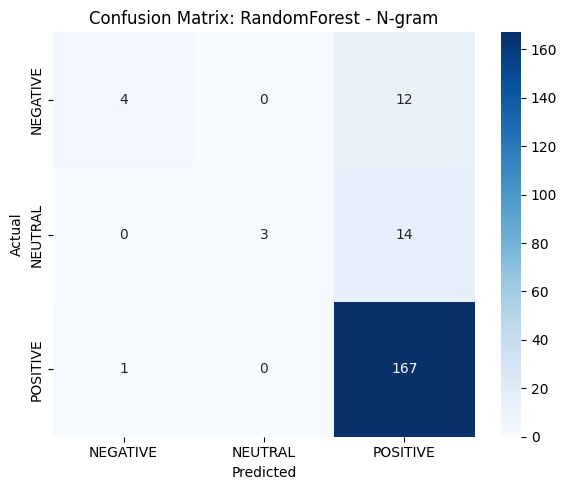

In [ ]:
# Best model
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]

print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Conclusion

 * Analyzed the distribution of customer sentiments.

 * Applied text preprocessing techniques to clean raw review data.

 * Vectorized the text using 3 different techniques and trained a Random Forest model & Naive Baye's Model

 * Achieved an macro F1 score of 0.57 on the test dataset.

 * Future improvements include hyperparameter tuning or trying alternative models for better performance.

# `The End`